In [1]:
import os
import warnings
warnings.filterwarnings("ignore")

from fastai.vision.all import *
from fastai.vision import *

import pandas as pd

In [2]:
DATASET_PATH = 'Fashion_Dataset/train'

In [3]:
class_names = []
for folder_name in os.listdir(DATASET_PATH):
    class_names.append(folder_name)

In [4]:
class_names

['clothing', 'footwear']

In [5]:
image_paths = []
labels = []

for i in range(len(class_names)):
    class_name = class_names[i]
    image_names = os.listdir(f'{DATASET_PATH}/{class_name}')
    for image_name in image_names:
        image_path = f'{DATASET_PATH}/{class_name}/{image_name}'
        image_paths.append(image_path)
        labels.append(i)

In [6]:
df = pd.DataFrame(
    {
        'name': image_paths,
        'label': labels
    }
)

In [7]:
df.head()

,name,label
0,Fashion_Dataset/train/clothing/2691.jpg,0
1,Fashion_Dataset/train/clothing/2693.jpg,0
2,Fashion_Dataset/train/clothing/2694.jpg,0
3,Fashion_Dataset/train/clothing/2695.jpg,0
4,Fashion_Dataset/train/clothing/2697.jpg,0


In [8]:
df.tail()

,name,label
61,Fashion_Dataset/train/footwear/3167.jpg,1
62,Fashion_Dataset/train/footwear/3228.jpg,1
63,Fashion_Dataset/train/footwear/3235.jpg,1
64,Fashion_Dataset/train/footwear/3301.jpg,1
65,Fashion_Dataset/train/footwear/3463.jpg,1


In [9]:
df.to_csv(
    path_or_buf=f'{DATASET_PATH}/labels.csv',
    index=False
)

Load the Data

In [10]:
dls = ImageDataLoaders.from_folder(
    path=DATASET_PATH,
    item_tfms=Resize(224),
    bs=16,
    batch_tfms=[Normalize.from_stats(*imagenet_stats), RandTransform()],
    valid_pct=0.2
)

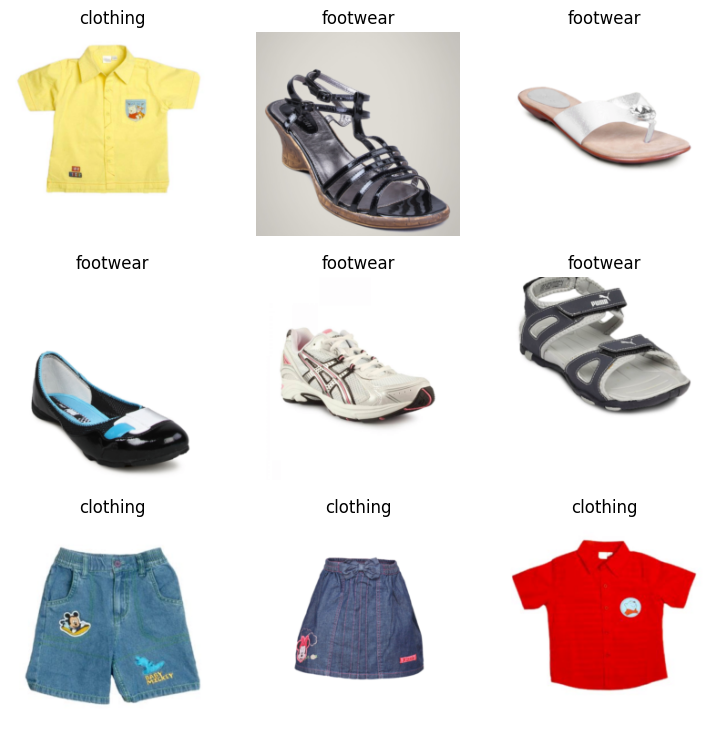

In [11]:
dls.show_batch()

Create a Model

In [12]:
model = vision_learner(
    dls=dls,
    arch=models.resnet50,
    metrics=[accuracy, error_rate]
)

In [13]:
model.fine_tune(
    epochs=3
)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.301232,0.683982,0.692308,0.307692,02:08


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.300366,0.055119,1.000000,0.000000,00:31
1,0.159394,0.039118,1.000000,0.000000,00:29
2,0.106878,0.022506,1.000000,0.000000,00:30


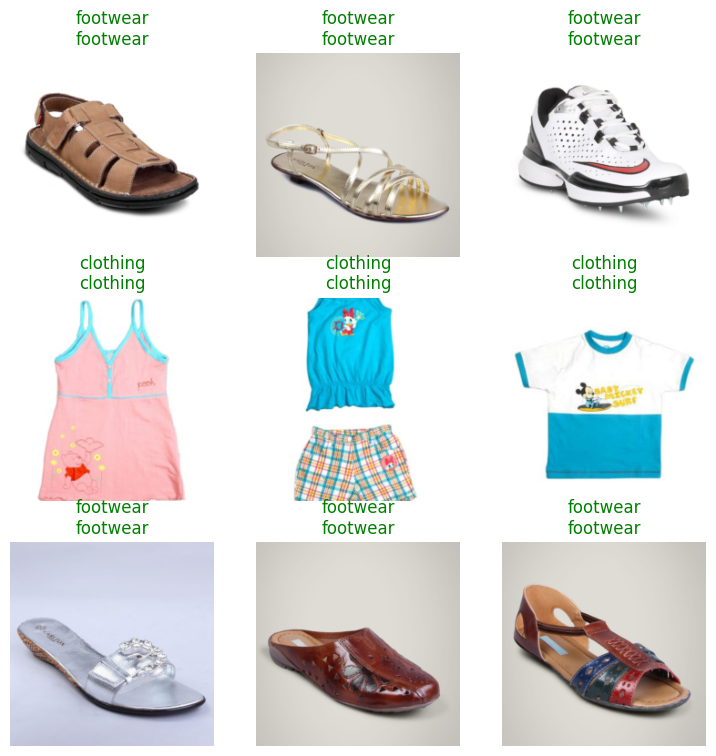

In [14]:
model.show_results()

Save the model

In [50]:
model.export('fashion_classifier.pkl')